In [36]:
import pandas as pd

In [37]:
df = pd.read_csv(r"C:\Users\rahul\OneDrive\Desktop\CA2PYTHON\SALESDATASET.csv")
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,24-11-2023,CUST001,Male,34,Beauty,3,50,150
1,2,27-02-2023,CUST002,Female,26,Clothing,2,500,1000
2,3,13-01-2023,CUST003,Male,50,Electronics,1,30,30
3,4,21-05-2023,CUST004,Male,37,Clothing,1,500,500
4,5,06-05-2023,CUST005,Male,30,Beauty,2,50,100


In [38]:
print("Dataset Shape:(Rows,Columns)", df.shape)

Dataset Shape:(Rows,Columns) (1000, 9)


In [39]:
print("\nColumn Information:")
print(df.info())


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [40]:
print(df.isnull().sum())


Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


In [41]:
high_sales = df[df["Total Amount"] > 1400]
print(high_sales)


     Transaction ID        Date Customer ID  Gender  Age Product Category  \
12               13  05-08-2023     CUST013    Male   22      Electronics   
14               15  16-01-2023     CUST015  Female   42      Electronics   
15               16  17-02-2023     CUST016    Male   19         Clothing   
46               47  06-11-2023     CUST047  Female   40           Beauty   
53               54  10-02-2023     CUST054  Female   38      Electronics   
..              ...         ...         ...     ...  ...              ...   
926             927  24-06-2023     CUST927    Male   43      Electronics   
941             942  18-03-2023     CUST942    Male   51         Clothing   
945             946  08-05-2023     CUST946    Male   62      Electronics   
955             956  19-08-2023     CUST956    Male   30         Clothing   
969             970  16-05-2023     CUST970    Male   59      Electronics   

     Quantity  Price per Unit  Total Amount  
12          3             500

In [8]:
sorted_df = df.sort_values(by="Total Amount" ,ascending = False)
print(sorted_df)


     Transaction ID        Date Customer ID  Gender  Age Product Category  \
64               65  05-12-2023     CUST065    Male   51      Electronics   
280             281  23-05-2023     CUST281  Female   29           Beauty   
268             269  01-02-2023     CUST269    Male   25         Clothing   
663             664  28-12-2023     CUST664  Female   44         Clothing   
633             634  08-10-2023     CUST634    Male   60      Electronics   
..              ...         ...         ...     ...  ...              ...   
426             427  15-08-2023     CUST427    Male   25      Electronics   
876             877  19-06-2023     CUST877  Female   58         Clothing   
954             955  14-07-2023     CUST955    Male   58         Clothing   
951             952  13-11-2023     CUST952  Female   57         Clothing   
966             967  17-04-2023     CUST967    Male   62           Beauty   

     Quantity  Price per Unit  Total Amount  
64          4             500

In [9]:
sorted_by_age = df.sort_values(by="Age", ascending=True)
print(sorted_by_age.head())


     Transaction ID        Date Customer ID  Gender  Age Product Category  \
36               37  23-05-2023     CUST037  Female   18           Beauty   
73               74  22-11-2023     CUST074  Female   18           Beauty   
537             538  17-09-2023     CUST538    Male   18         Clothing   
555             556  04-06-2023     CUST556  Female   18      Electronics   
594             595  09-11-2023     CUST595  Female   18         Clothing   

     Quantity  Price per Unit  Total Amount  
36          3              25            75  
73          4             500          2000  
537         3              50           150  
555         1              50            50  
594         4             500          2000  


In [10]:
category_sales = df.groupby("Product Category")["Total Amount"].sum()
print(category_sales)


Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


In [11]:
avg_quantity = df.groupby("Product Category")["Quantity"].mean()
print(avg_quantity)


Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64


In [12]:
sales_by_gender = df.groupby("Gender")["Total Amount"].sum()
print(sales_by_gender)


Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64


In [13]:
top_products = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)
print(top_products)


Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64


In [14]:
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)  
df["Month"] = df["Date"].dt.month  # Extract month 
monthly_sales = df.groupby("Month")["Total Amount"].sum().sort_values(ascending=False)
print(monthly_sales)



Month
5     53150
10    46580
12    44690
2     44060
1     36980
8     36960
6     36715
7     35465
11    34920
4     33870
3     28990
9     23620
Name: Total Amount, dtype: int64


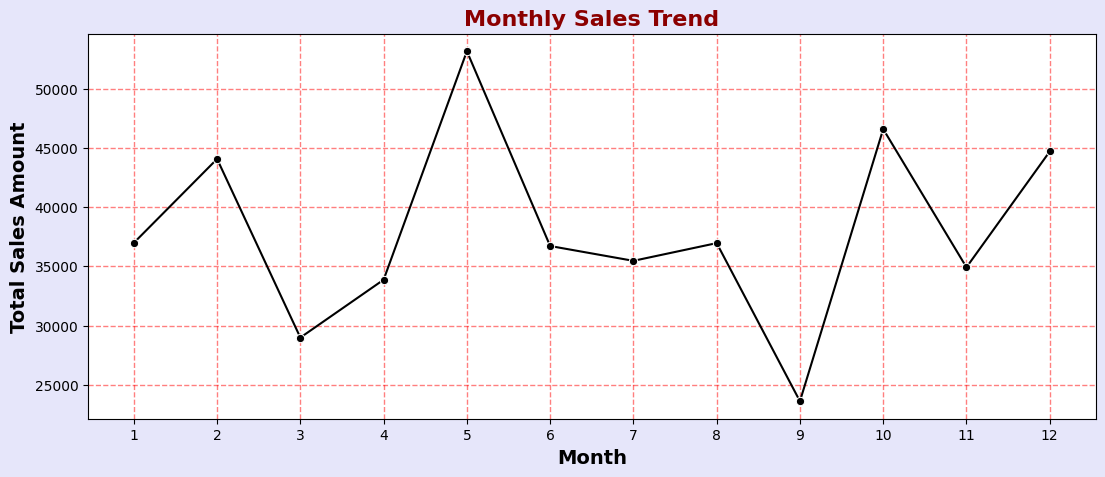

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot monthly sales trend
plt.figure(figsize=(13, 5),facecolor ="lavender")
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker="o", linestyle="-", color="black")

plt.xlabel("Month", fontsize=14, fontweight="bold")
plt.ylabel("Total Sales Amount", fontsize=14, fontweight="bold")
plt.title("Monthly Sales Trend", fontsize=16, fontweight="bold", color="darkred")
plt.grid(linestyle="--", linewidth=1, color="red", alpha=0.5)
plt.xticks(range(1, 13)) 


plt.show()


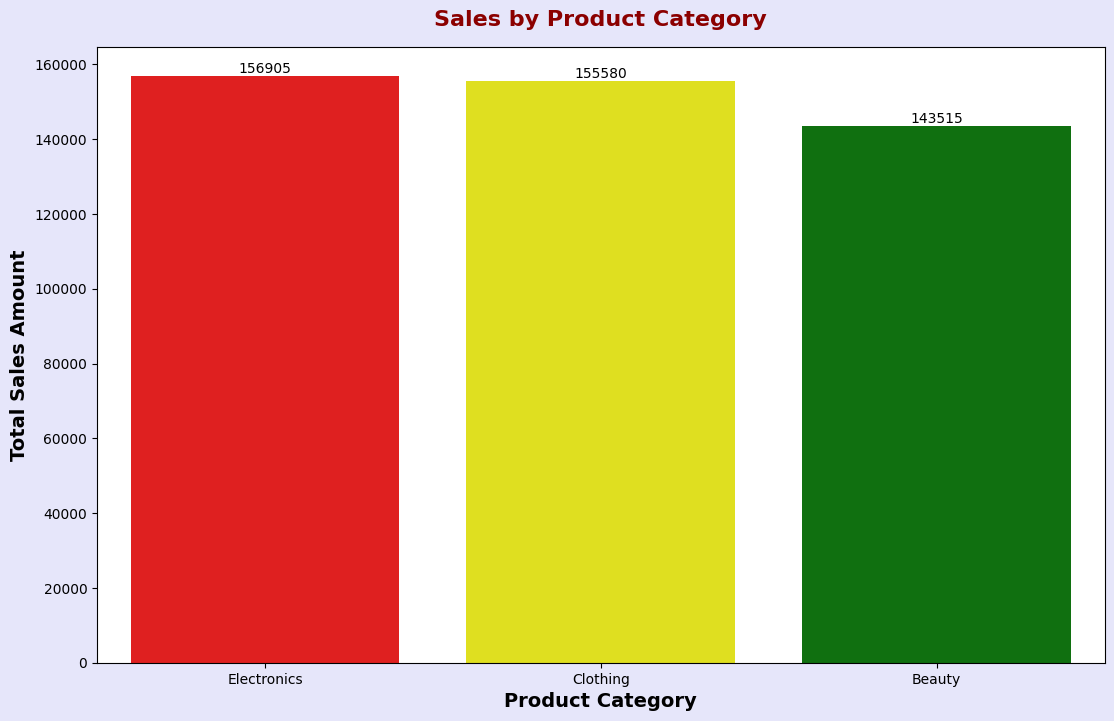

In [16]:
# Aggregate total sales by Product Category
category_sales = df.groupby("Product Category")["Total Amount"].sum().sort_values(ascending=False)

# Plot bar chart (Fixing the FutureWarning)
plt.figure(figsize=(13, 8),facecolor = "lavender")
custom_colors = ["red", "yellow", "green" ]
ax=sns.barplot(x=category_sales.index, y=category_sales.values, hue=category_sales.index, dodge=False, palette=custom_colors)
for container in ax.containers:
     ax.bar_label(container,  label_type='edge', fontsize=10)

plt.xlabel("Product Category",fontsize=14, fontweight="bold")
plt.ylabel("Total Sales Amount",fontsize=14, fontweight="bold")
plt.title("Sales by Product Category",fontsize=16, fontweight="bold",color="darkred", pad=15)

plt.show()


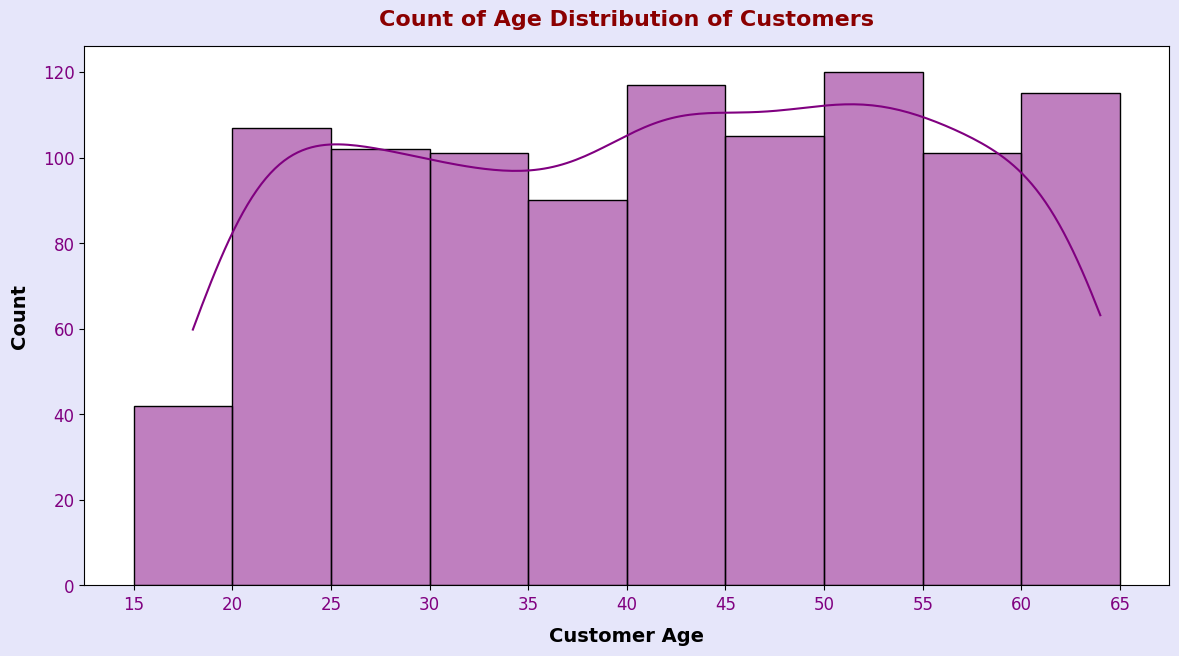

In [17]:
import numpy as np
plt.figure(figsize=(14, 7), facecolor="lavender")
sns.histplot(df["Age"],bins = np.arange(15, 66, 5)  , kde=True, color="purple")

plt.xlabel("Customer Age", fontsize=14, fontweight="bold", color="black", labelpad=10)
plt.ylabel("Count", fontsize=14, fontweight="bold", color="black", labelpad=10)
plt.title("Count of Age Distribution of Customers", fontsize=16, fontweight="bold", color="darkred", pad=15)
# plt.xlim(15, 66)
plt.xticks(fontsize=12, color="purple",ticks=np.arange(15, 66, 5))
plt.yticks(fontsize=12, color="purple")

plt.show()


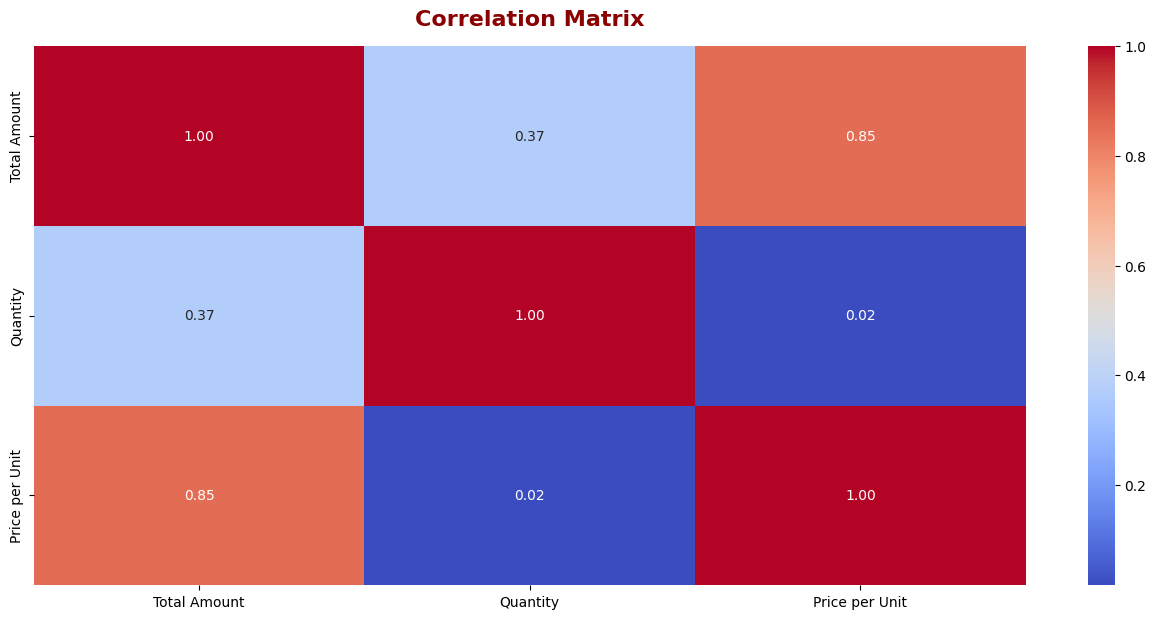

In [18]:
# Compute correlation matrix
correlation_matrix = df[["Total Amount", "Quantity", "Price per Unit"]].corr()

# Create heatmap
plt.figure(figsize=(16, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix",fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.show()


In [19]:
!pip install scipy

In [20]:
 pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


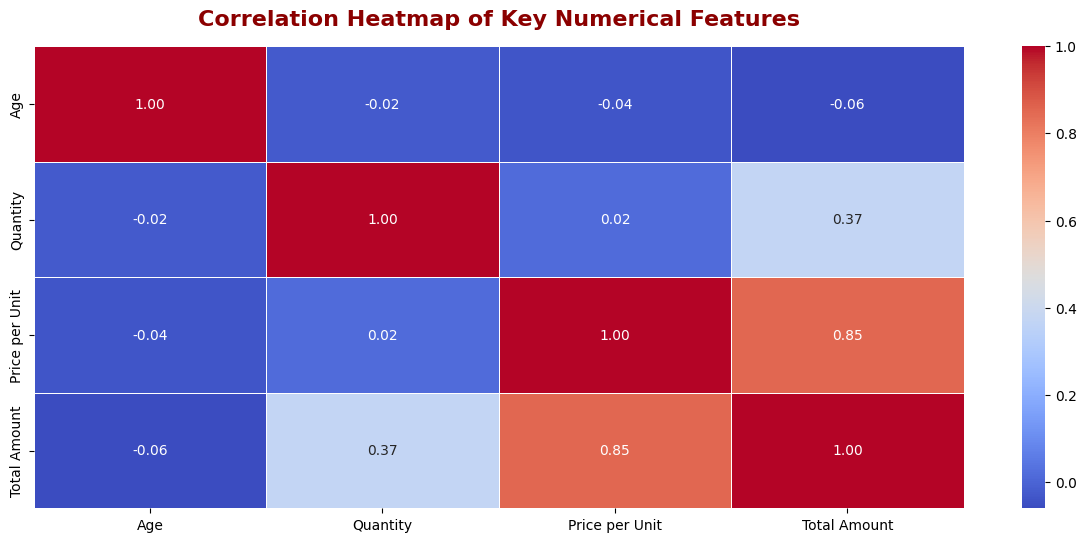

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns
numeric_cols = ["Age", "Quantity", "Price per Unit", "Total Amount"]

# Compute correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(15,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Key Numerical Features",fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.show()


In [22]:
from scipy.stats import ttest_ind

# Split data into two groups: Male & Female
male_sales = df[df["Gender"] == "Male"]["Total Amount"]
female_sales = df[df["Gender"] == "Female"]["Total Amount"]

# Perform independent t-test
t_stat, p_value = ttest_ind(male_sales, female_sales, equal_var=False)

# Print results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in sales between Male and Female customers.")
else:
    print("No significant difference in sales between Male and Female customers.")


T-statistic: -0.03
P-value: 0.9748
No significant difference in sales between Male and Female customers.


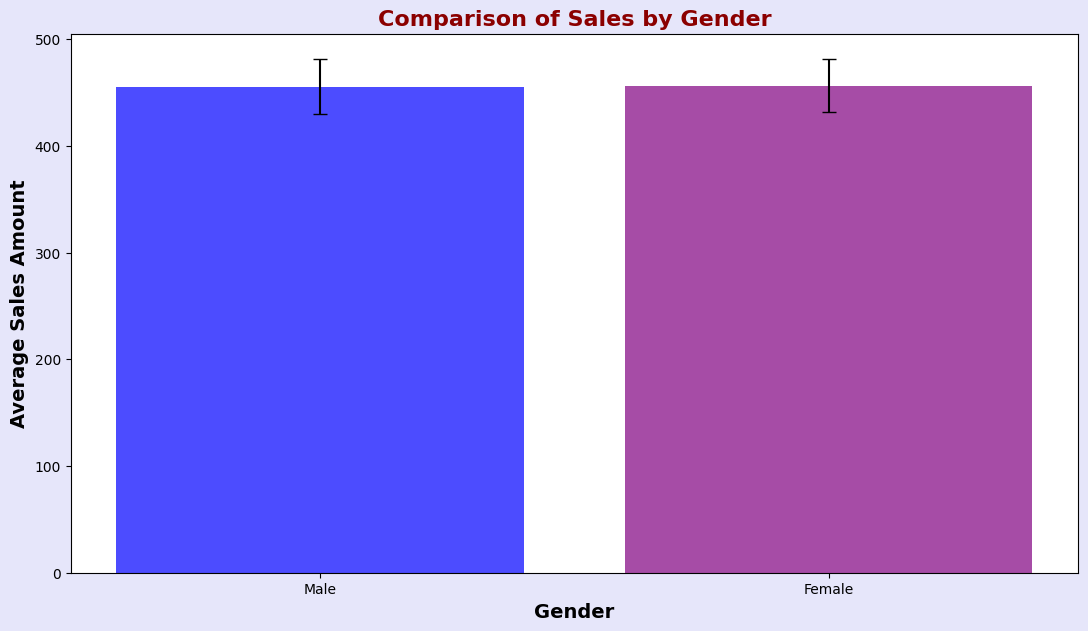

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate means and standard errors
male_mean = male_sales.mean()
female_mean = female_sales.mean()

male_std_error = male_sales.std() / np.sqrt(len(male_sales))
female_std_error = female_sales.std() / np.sqrt(len(female_sales))

# Data for the bar chart
categories = ["Male", "Female"]
means = [male_mean, female_mean]
std_errors = [male_std_error, female_std_error]

# Create the figure and bar chart
plt.figure(figsize=(13, 7),facecolor="lavender")
plt.bar(categories, means, yerr=std_errors, capsize=5, color=["blue", "purple"], alpha=0.7)

# Customize chart appearance
plt.xlabel("Gender", fontsize=14, fontweight="bold")
plt.ylabel("Average Sales Amount", fontsize=14, fontweight="bold")
plt.title("Comparison of Sales by Gender", fontsize=16, fontweight="bold", color="darkred")

# Display the graph
plt.show()


In [24]:
from scipy.stats import ttest_ind

# Define Discounted and Non-Discounted categories
median_price = df["Price per Unit"].median()
df["Discounted"] = df["Price per Unit"] < median_price

# Split the data into two groups
discounted_sales = df[df["Discounted"]]["Total Amount"]
non_discounted_sales = df[~df["Discounted"]]["Total Amount"]

# Perform t-test
t_stat, p_value = ttest_ind(discounted_sales, non_discounted_sales)

# Display results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("🔍 Significant difference: Discounts impact sales!")
else:
    print("❌ No significant impact of discounts on sales.")


T-statistic: -21.30
P-value: 0.0000
🔍 Significant difference: Discounts impact sales!


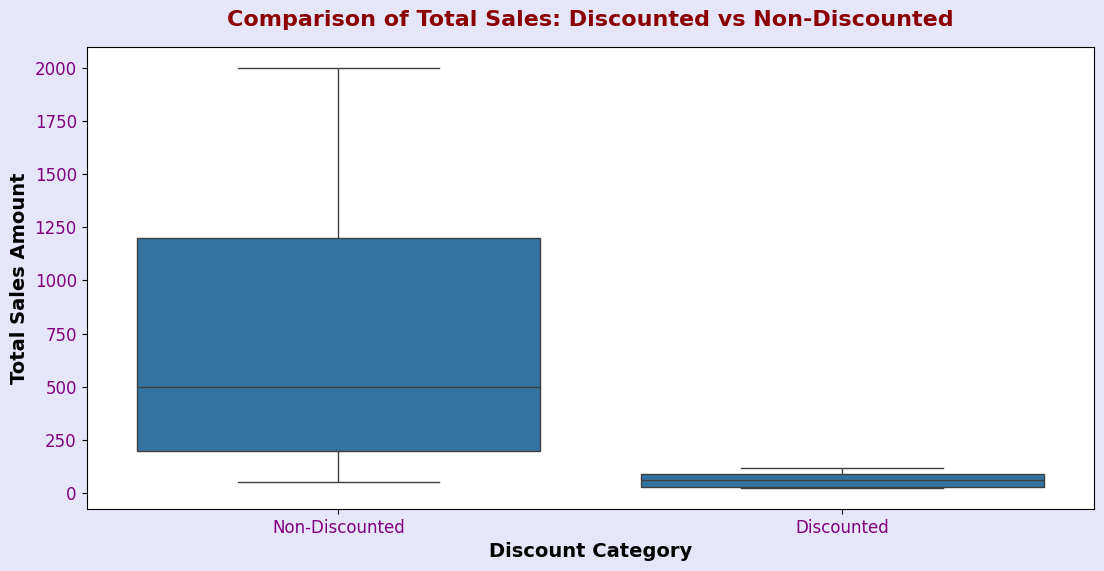

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Add a categorical label for visualization
df["Discount Category"] = df["Discounted"].replace({True: "Discounted", False: "Non-Discounted"})

# Create the boxplot
plt.figure(figsize=(13, 6),facecolor= "lavender")
sns.boxplot(data=df, x="Discount Category", y="Total Amount")

# Add title and labels
plt.title("Comparison of Total Sales: Discounted vs Non-Discounted", fontsize=16, fontweight="bold", pad=15, color="darkred")
plt.xlabel("Discount Category", fontsize=14, fontweight="bold")
plt.ylabel("Total Sales Amount", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, color="purple")
plt.yticks(fontsize=12, color="purple")

# Show the plot
plt.show()


In [26]:
!pip install scikit-learn


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Select Features and Target Variable
X = df[["Age", "Quantity", "Price per Unit"]]  # Features
y = df["Total Amount"]  # Target

# Split Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display Results
print(f"📉 Mean Absolute Error (MAE): {mae:.2f}")
print(f"📊 R² Score: {r2:.4f}")

# Interpretation
if r2 > 0.7:
    print("✅ Good Model: The model explains a significant portion of variance in sales data.")
else:
    print("⚠️ Model needs improvement: Consider adding more features.")


📉 Mean Absolute Error (MAE): 173.12
📊 R² Score: 0.8569
✅ Good Model: The model explains a significant portion of variance in sales data.


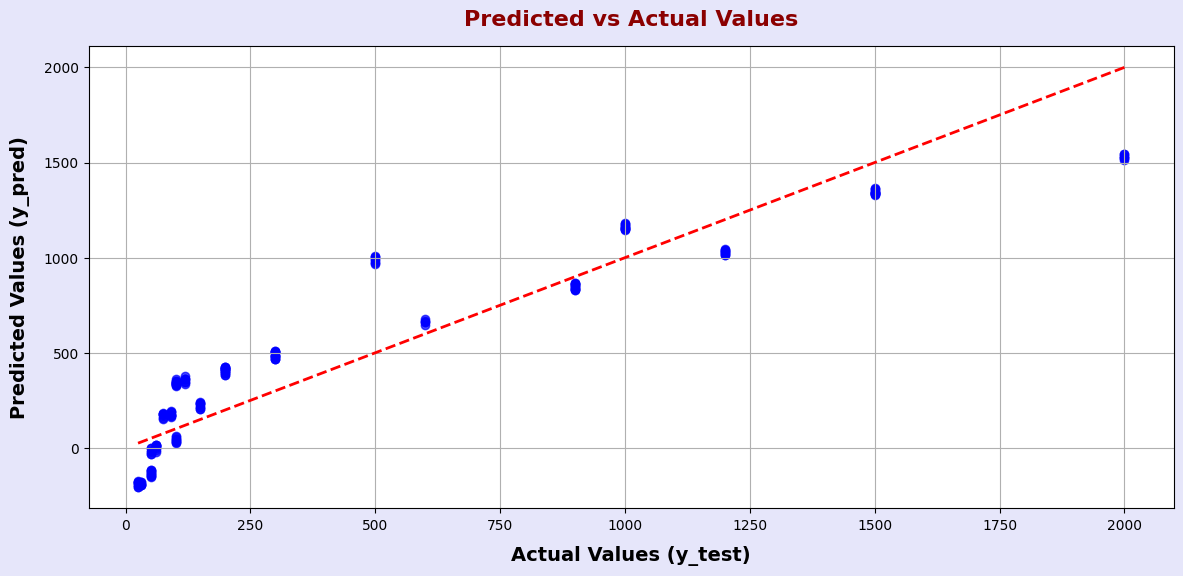

In [28]:
import matplotlib.pyplot as plt

# Scatter plot to visualize predicted vs actual values
plt.figure(figsize=(14, 6),facecolor="lavender")
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.title("Predicted vs Actual Values",fontsize=16, fontweight="bold", color="darkred", pad=15)
plt.xlabel("Actual Values (y_test)", fontsize=14, fontweight="bold", color="black", labelpad=10)
plt.ylabel("Predicted Values (y_pred)", fontsize=14, fontweight="bold", color="black", labelpad=10)
plt.grid(True)
plt.show()


In [30]:
print("-------Summary of Key Findings----------")
print("1. Top Selling Products")
print(top_products)
print("2. Average Quantity purchased per Product Category")
print(avg_quantity)
print("3. Sales By gender ")
print(sales_by_gender)
print("4. Identify peak sales months for business strategy")
print(monthly_sales)
print("5. Correlation Matrix using heatmap")
print("6. Perform T-test to determine Sales by Category")
print("T-statistic: -0.03\nP-value: 0.9748\nNo significant difference in sales between Male and Female customers.")
print("7. Perform T-test to Compare  Total Sales: Discounted vs Non-Discounted")
print("T-statistic: -21.30\nP-value: 0.0000\nSignificant difference: Discounts impact sales!")
print("8. Trains a Linear Regression model to predict sales")
print("Mean Absolute Error (MAE): 173.12\nR² Score: 0.8569\nGood Model: The model explains a significant portion of variance in sales data")


-------Summary of Key Findings----------
1. Top Selling Products
Product Category
Electronics    156905
Clothing       155580
Beauty         143515
Name: Total Amount, dtype: int64
2. Average Quantity purchased per Product Category
Product Category
Beauty         2.511401
Clothing       2.547009
Electronics    2.482456
Name: Quantity, dtype: float64
3. Sales By gender 
Gender
Female    232840
Male      223160
Name: Total Amount, dtype: int64
4. Identify peak sales months for business strategy
Month
5     53150
10    46580
12    44690
2     44060
1     36980
8     36960
6     36715
7     35465
11    34920
4     33870
3     28990
9     23620
Name: Total Amount, dtype: int64
5. Correlation Matrix using heatmap
6. Perform T-test to determine Sales by Category
T-statistic: -0.03
P-value: 0.9748
No significant difference in sales between Male and Female customers.
7. Perform T-test to Compare  Total Sales: Discounted vs Non-Discounted
T-statistic: -21.30
P-value: 0.0000
Significant differenc